In [810]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
print(os.getcwd())
path="/Users/atousachaharsoughshirazi/Desktop/Bootcamp/Capstone_2/bank-additional"
os.chdir(path)
file="bank-additional-full.csv"
df=pd.read_csv(file, sep=';', header=0)
#print(df.keys())
print(df.head(5))

/Users/atousachaharsoughshirazi/Desktop/Bootcamp/Capstone_2/bank-additional
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexiste

In [811]:
df.shape

(41188, 21)

In [812]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [813]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [814]:
#There is no null value in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [815]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [816]:

dfm=df[df['month']=='may']
dfm.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39770, 39771, 39772, 39773, 39774, 39775, 39776, 39777, 39778,
            39779],
           dtype='int64', length=13769)

In [817]:
month=list(df.month.unique())
for i in month:
    i_index=df[df['month']==i].index
    i_startindex=[]
    for j in range(len(i_index)-1):
        if (i_index[j+1]-i_index[j])>1:
            i_startindex.append(i_index[j])
            i_startindex.append(i_index[j+1])
       
    print(i, i_startindex)
    

may [7762, 30430, 36223, 39568]
jun [12136, 36224, 36938, 39780]
jul [18821, 36939, 37116, 40009]
aug [23996, 37117, 37886, 40320]
oct [24063, 38154, 38600, 40856]
nov [27679, 38601, 38957, 41060]
dec [27689, 38958]
mar [27971, 39130]
apr [30429, 39394]
sep [38153, 40553]


In [818]:
df['year']=df['month' ]

df.iloc[0:27690,21]='2008'
df.iloc[27690:38959, 21]='2009'
df.iloc[38959:41188, 21]='2010'
df.iloc[41187]

age                                74
job                           retired
marital                       married
education         professional.course
default                            no
housing                           yes
loan                               no
contact                      cellular
month                             nov
day_of_week                       fri
duration                          239
campaign                            3
pdays                             999
previous                            1
poutcome                      failure
emp.var.rate                     -1.1
cons.price.idx                 94.767
cons.conf.idx                   -50.8
euribor3m                       1.028
nr.employed                    4963.6
y                                  no
year                             2010
Name: 41187, dtype: object

In [819]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name, df[column_name].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2
year 3


Column descriptions: 

 1- age (numeric)
 
 2 - job : type of job (categorical: 'admin.','blue collar', 'entrepreneur',  'housemaid', 'management', 'retired', 'selfemployed','services','student','technician','unemployed','unknown')
 
 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means  divorced or widowed)
 
 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course', 'university.degree','unknown')
 
 5- default: has credit in default? (categorical: 'no','yes','unknown')
 
 6- housing: has a housing loan? (categorical: 'no','yes','unknown')
 
 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
 
 related with the last contact of the current campaign:
 
 8 - contact: contact communication type (categorical: 'cellular','telephone') 
 
 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 
 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 
 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
 Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark 
 purposes and should be discarded if the intention is to have a realistic predictive model.
 
 other attributes:
 
 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
(numeric; 999 means client was not previously contacted)

 14 - previous: number of contacts performed before this campaign and for this client (numeric)
 
 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 
 social and economic context attributes:
 
 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 
 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
 
 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 
 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 
 20 - nr.employed: number of employees - quarterly indicator (numeric)


In [820]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,': \n', 
          df[column_name].value_counts())

age : 
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
job : 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital : 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education : 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default : 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing : 
 yes        21576
no         18622
un

The result of exploring the columns with value_counts():

* There is no null value in the dataset
* jobs: 330 are unknown and needs to be filled
* marital status: 80 are unknown and needs to be filled
* education: 1731 are unknown
* default: 8597 are unknown
* housing: 990 are unknown
* loan:990 are unknown
* duration: 4 rows have duration of zero meaning that the call was not performed.
* pdays: the number of days passed by after the last call. 999 means that the client was not previouly contacted and this case needs special handling. 39673 cases of 999 are present.
* all other columns have no unknown values

In [821]:
#Four of the calls have duration 0 meaning that the customer was not contacted.
df[df.duration==0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,2008
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no,2009
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,2009


In [822]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [823]:
df.marital.describe()

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

In [824]:
#There are 12 duplicate rows as can be seen from the analysis below and the profile report.
duplicateRowsDF = df[df.duplicated(keep=False)]
duplicateRowsDF
df.drop_duplicates(keep='first',ignore_index=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010


In [825]:
# report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
# report

In [826]:
#Calculate the correlation coefficients

#corr =df.corr()

#plot it in the next line

#corr.round(2).style.background_gradient(cmap='coolwarm')

In [827]:
#df.drop(['duration'], axis=1, inplace=True)
#df.info()

In [828]:

#  x=df.values
#  Error =[]
#  for i in range(1,11):
#      kmeans = KMeans(n_clusters = i).fit(x)
#      kmeans.fit(x)
#      Error.append(kmeans.inertia_)
 
#  plt.plot(range(1, 11), Error)
#  plt.title('Elbow method')
#  plt.xlabel('No of clusters')
#  plt.ylabel('Error')
#  plt.show()

In [829]:
#dfo=df['marital'].values
#df = pd.concat([df.drop(columns='marital', axis=1), pd.get_dummies(dfo, drop_first=True)], axis=1)
#df = pd.concat([df.drop([df.state], axis=1), pd.get_dummies(df.state)], axis=1)
#df.head(-5)

In [830]:
#dfo=df['education'].values


#df = pd.concat([df.drop(columns='education', axis=1), pd.get_dummies(dfo, drop_first=True)], axis=1)
#df = pd.concat([df.drop([df.state], axis=1), pd.get_dummies(df.state)], axis=1)
#df.head(-5)

In [831]:
#sns.pairplot(df)

In [832]:
#df1=df.set_index('month', 'y').groupby('month').mean()
#df1=df.set_index('month').groupby('month').count()
#df1
#df[df['y']=='yes']

In [833]:
#sns.pairplot(df1)

In [834]:
dfn=df[['year','month','y']]
dfn.head()

,year,month,y
0,2008,may,no
1,2008,may,no
2,2008,may,no
3,2008,may,no
4,2008,may,no


In [835]:
dfnn=dfn.set_index('year','month').groupby(by=['year','month'])
dfnn['y'].value_counts()

year  month  y  
2008  aug    no     4904
             yes     271
      dec    no        9
             yes       1
      jul    no     6278
             yes     407
      jun    no     4186
             yes     188
      may    no     7523
             yes     240
      nov    no     3426
             yes     190
      oct    yes      42
             no       25
2009  apr    no     2016
             yes     442
      aug    no      506
             yes     264
      dec    yes       1
      jul    no      112
             yes      66
      jun    no      451
             yes     264
      mar    no      156
             yes     126
      may    no     5270
             yes     524
      nov    no      189
             yes     168
      oct    no      267
             yes     180
      sep    no      161
             yes     106
2010  apr    yes      97
             no       77
      aug    yes     120
             no      113
      dec    yes      87
             no       84
      ju

In [836]:
dfnn=dfn.set_index('month','year').groupby(by=['month', 'year'])
dfnn['y'].value_counts()

month  year  y  
apr    2009  no     2016
             yes     442
       2010  yes      97
             no       77
aug    2008  no     4904
             yes     271
       2009  no      506
             yes     264
       2010  yes     120
             no      113
dec    2008  no        9
             yes       1
       2009  yes       1
       2010  yes      87
             no       84
jul    2008  no     6278
             yes     407
       2009  no      112
             yes      66
       2010  yes     176
             no      135
jun    2008  no     4186
             yes     188
       2009  no      451
             yes     264
       2010  no      122
             yes     107
mar    2009  no      156
             yes     126
       2010  yes     150
             no      114
may    2008  no     7523
             yes     240
       2009  no     5270
             yes     524
       2010  yes     122
             no       90
nov    2008  no     3426
             yes     190
       2

In [837]:
df1=df[['month','y']]
df1.head()


,month,y
0,may,no
1,may,no
2,may,no
3,may,no
4,may,no


In [838]:
 
df2=df1.groupby('month')
df2['y'].value_counts()


month  y  
apr    no      2093
       yes      539
aug    no      5523
       yes      655
dec    no        93
       yes       89
jul    no      6525
       yes      649
jun    no      4759
       yes      559
mar    yes      276
       no       270
may    no     12883
       yes      886
nov    no      3685
       yes      416
oct    no       403
       yes      315
sep    no       314
       yes      256
Name: y, dtype: int64

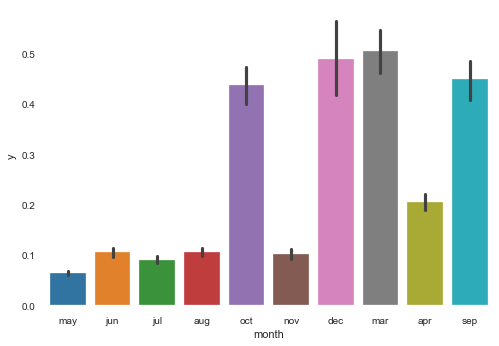

In [839]:
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='month', y='y', data=df2)

plt.show()

In [840]:
pd.to_numeric(df2.y)
df3=pd.DataFrame(df2.groupby('month', sort=False).sum())
# df3.reindex()
df3
# #plt.bar(x='month', height='y', hue='month', data=df3)
# #sns.swarmplot(x='month', y='y', data=df3)


,y
month,
may,886
jun,559
jul,649
aug,655
oct,315
nov,416
dec,89
mar,276
apr,539


In [841]:
df1['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [842]:
# for i in df.columns.values:
#     dfi=df[[i ,'y']]
#     dfi2=dfi.replace({'y':{'yes':1 ,'no': 0 }})
#     pd.to_numeric(dfi2.y)
#     df3=pd.DataFrame(dfi2.set_index(i).groupby(i).sum().sort_values(by=['y'], ascending=False))
#     plt.bar(i,'y', data=df3)
#     plt.show()
#     #print(dfi2.set_index(i).groupby(i).sum().sort_values(by=['y'], ascending=False))
    
    


In [843]:
# for i in df.columns.values:
#     dfi=df[[i ,'y']]
#     dfi2=dfi.replace({'y':{'yes':1 ,'no': 0 }})
#     sns.barplot(x=i, y='y', data=df2)
#     plt.show()



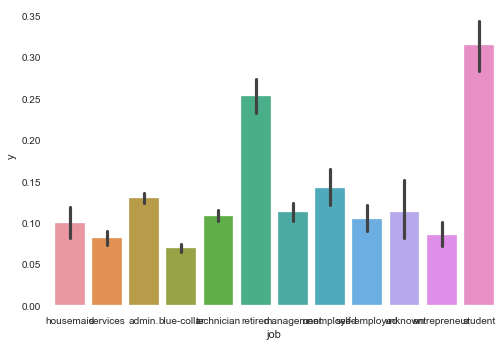

In [844]:
df1=df[['job','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='job', y='y', data=df2)

plt.show()

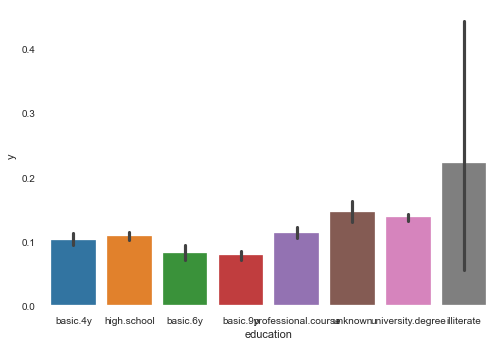

In [845]:
df1=df[['education','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='education', y='y', data=df2)

plt.show()

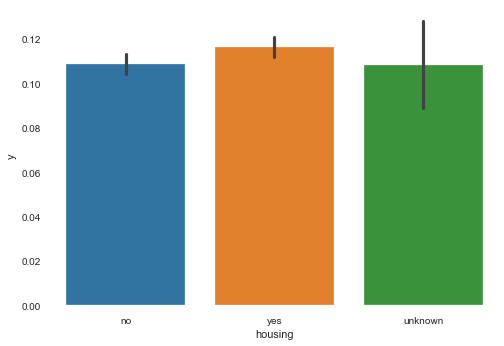

In [846]:
df1=df[['housing','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='housing', y='y', data=df2)

plt.show()

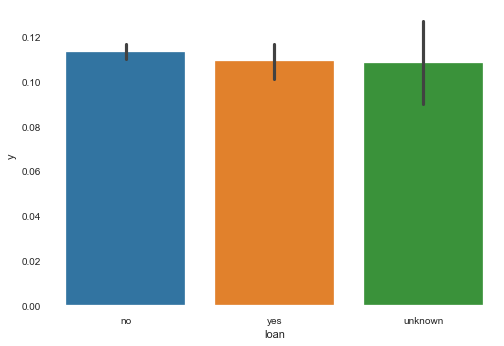

In [847]:
df1=df[['loan','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='loan', y='y', data=df2)

plt.show()

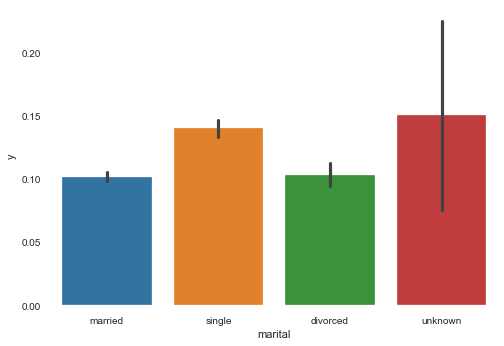

In [848]:
df1=df[['marital','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='marital', y='y', data=df2)

plt.show()

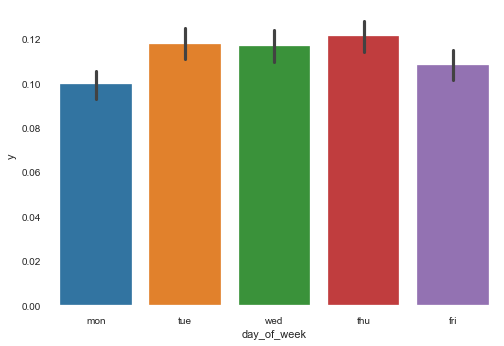

In [849]:
df1=df[['day_of_week','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='day_of_week', y='y', data=df2)

plt.show()

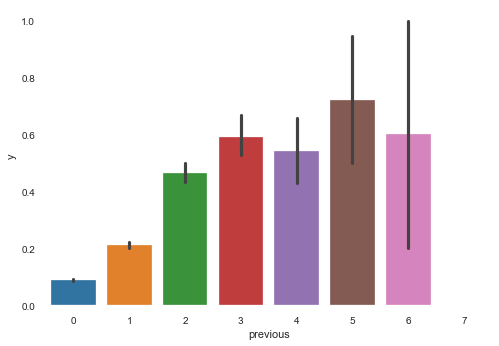

In [850]:
df1=df[['previous','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns.barplot(x='previous', y='y', data=df2)

plt.show()